<a href="https://colab.research.google.com/github/nitishragu12/ImageClassification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
flat_data = []
images = []

data_dir = '/content/drive/MyDrive/FRUITS LATEST'
categories = ['Apples', 'Oranges']

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(data_dir, i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # plt.imshow(img_array)
    # plt.show()
    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.model_selection import GridSearchCV
# from sklearn import SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
model = SVC()
param = {
    'kernel':['linear','rbf','poly'],
    'C':[0.1,1,10,100]
}

grid = GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
y_pred = grid.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.9166666666666666

In [ ]:
confusion_matrix(y_pred,y_test)

array([[4, 0],
       [1, 7]])

Enter your URLhttps://images2.minutemediacdn.com/image/upload/c_crop,h_2450,w_4368,x_0,y_165/v1562080363/shape/mentalfloss/29942-gettyimages-155302141.jpg?itok=45ARGbzy
 PREDICTED OUTPUT: Oranges


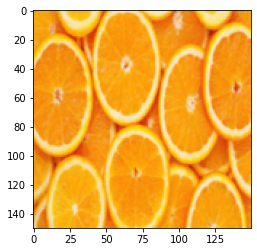

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(img_resized)
y_out = grid.predict(flat_data)
y_out = categories[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')